# SUMMARY:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

The dataset for this project was collected from:https://www.kaggle.com/c/rossmann-store-sales/data


# Data fields




# Exploring the data

In [1]:
#IMPORT LIB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats



In [2]:
df_sales = pd.read_csv("train.csv")
df_sales.head()

C:\Users\loli\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
#we see the  column date have a type object the we can change to datetime
df_sales['Date']=pd.to_datetime(df_sales.Date)


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
#df_sales.Date.dt.day

In [6]:
df_sales.shape
#9 columns
#1017209 rows

(1017209, 9)

In [7]:
df_sales.tail()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
#mean sales=5773 ,min sales=0,max sales=41551
#mean of coustomers 633,max=7388,min=0
#we have 1115 Store

df_sales.describe().round(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00


In [9]:
df_sales.describe(include='object')

,StateHoliday
count,1017209
unique,5
top,0
freq,855087


In [10]:
# we need to read a store dataset

df_store= pd.read_csv("store.csv")

In [11]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
#both dataset share the columns Store as a primary key
# we need no merge both dataset 

# Analyze and future engineering-> Dataset sales

In [13]:
# No NAn 
df_sales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Date'}>],
       [<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>]],
      dtype=object)

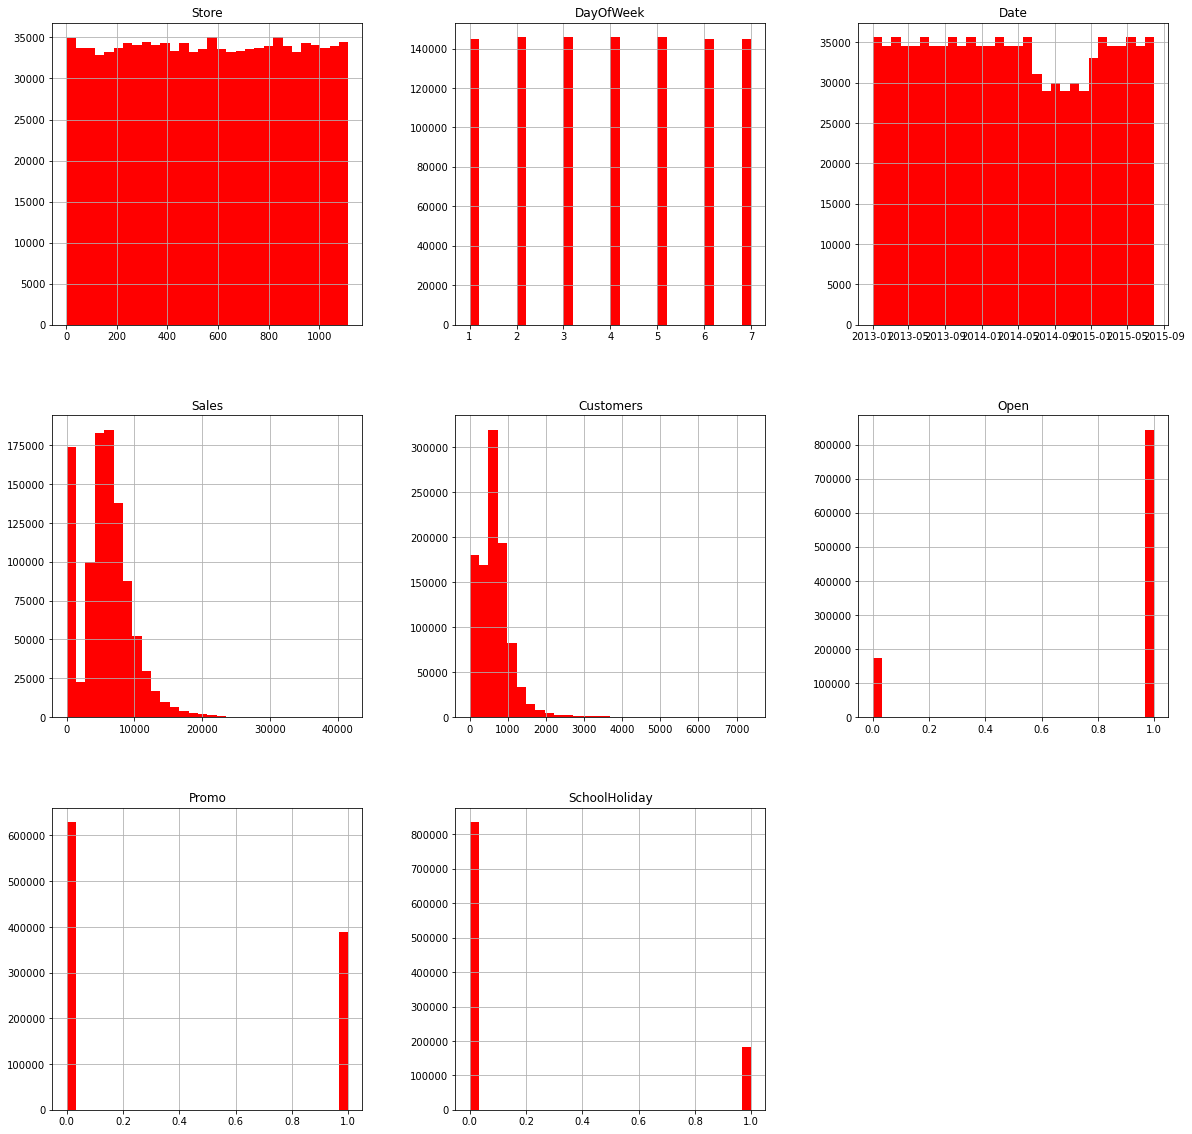

In [15]:
#let's see the distribution of the df_sales
#Data is distributed equally over several days of the week (~150000 observations x 7 days = ~1.1 million observations)
# Stores are open ~ 80% of the time
#Average sales around 5000-6000 Euros-->right skew
#Average costumers around 600 per day-->right skew
# Promo 1 ran approximately 40% of the time
#School holidays last about 18% of the time
#Shops are open ~80% of the time

df_sales.hist(bins=30,figsize=(20,20),color='r')

In [16]:
df_sales.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [17]:
a=df_sales.Open.value_counts()[0]
b=df_sales.Open.value_counts()[1]
print("Number of opened store ={}".format(a))
print("Number of closed store ={}".format(b))
print("percentage of stores closed is={}%".format(100* (a/len(df_sales))))

Number of opened store =172817
Number of closed store =844392
percentage of stores closed is=16.989330609540417%


In [18]:
#as we can see there are no sales when the stores are closed so, we only treat the data when the store is open.
df_sales.loc[df_sales.Open==0]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [19]:
df_sales=df_sales.loc[df_sales.Open==1]

In [20]:
df_sales.shape

(844392, 9)

In [21]:
#the open column will not be necessary so we delete it
df_sales.drop(columns=["Open"],axis=1,inplace=True)

In [22]:
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [23]:
df_sales.describe().round(2)

#the average sales and customers has improved
# but we steel having min of sales ==0, let see how many rows with sales==0

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00
mean,558.42,3.52,6955.51,762.73,0.45,0.19
std,321.73,1.72,3104.21,401.23,0.50,0.40
min,1.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,4859.00,519.00,0.00,0.00
50%,558.00,3.00,6369.00,676.00,0.00,0.00
75%,837.00,5.00,8360.00,893.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00


In [24]:
np.sum(df_sales.Sales==0)



54

In [25]:
#we take only sales>0
df_sales=df_sales.loc[df_sales.Sales>0]


In [29]:
#reset index 
df_sales.reset_index(drop=True,inplace=True)

In [32]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          844338 non-null  int64         
 1   DayOfWeek      844338 non-null  int64         
 2   Date           844338 non-null  datetime64[ns]
 3   Sales          844338 non-null  int64         
 4   Customers      844338 non-null  int64         
 5   Promo          844338 non-null  int64         
 6   StateHoliday   844338 non-null  object        
 7   SchoolHoliday  844338 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 51.5+ MB


In [33]:
#index=false so as not to have double index
df_sales.to_csv("Sales.csv",index=False)

In [ ]:
#df_sales=pd.read_csv("Sales.csv")

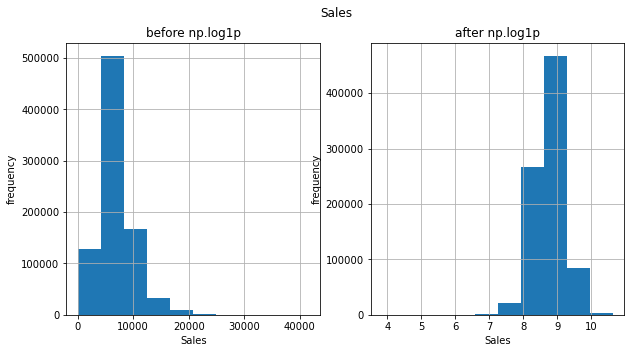

In [34]:
# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df_sales["Sales"].hist(ax=ax_before,)

# Apply a log transformation (numpy syntax) to this column
df_sales["Sales"].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='Sales')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='Sales')
fig.suptitle("Sales");

C:\Users\loli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\loli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


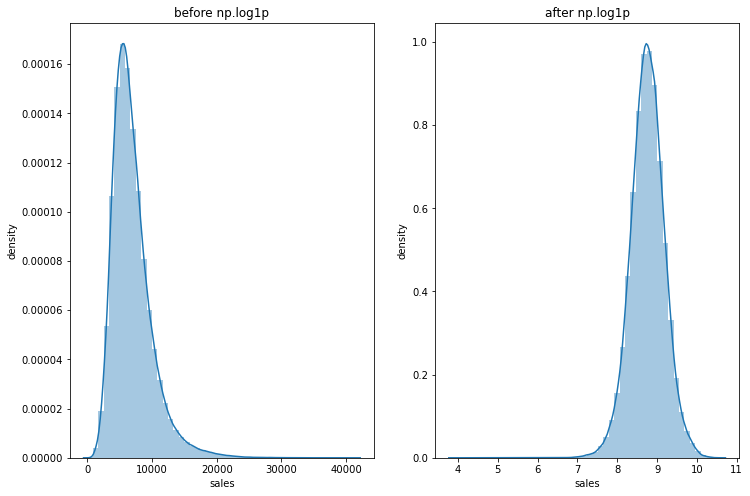

In [35]:
# Create two "subplots" and a "figure" using matplotlib
fig=plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# Create a histogram on the "ax_before" subplot
sns.distplot(df_sales["Sales"],ax=ax1)

# Apply a log transformation (numpy syntax) to this column
sns.distplot(np.log1p(df_sales["Sales"]),ax=ax2)


# Formatting of titles etc. for each subplot
ax1.set(title='before np.log1p', ylabel='density', xlabel='sales')
ax2.set(title='after np.log1p', ylabel='density', xlabel='sales')
##fig.suptitle('Field "{}"'.format(field));
plt.show()

In [38]:
df_sales.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [39]:
df_sales.StateHoliday.value_counts()

0    731308
0    112120
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [41]:
df_sales.loc[df_sales.StateHoliday==0]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
271183,730,4,2014-09-25,5732,722,0,0,0
271184,731,4,2014-09-25,7470,802,0,0,0
271185,732,4,2014-09-25,5484,730,0,0,0
271186,733,4,2014-09-25,13801,3392,0,0,0
271187,734,4,2014-09-25,3519,404,0,0,0
...,...,...,...,...,...,...,...,...
489960,562,7,2014-01-19,16929,2829,0,0,0
489961,676,7,2014-01-19,9870,1713,0,0,0
489962,682,7,2014-01-19,6352,1107,0,0,0
489963,733,7,2014-01-19,14469,3042,0,0,0


In [42]:
df_sales.loc[df_sales.StateHoliday=='0']

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
844316,1111,3,2013-01-02,5097,505,0,0,1
844317,1112,3,2013-01-02,10797,892,0,0,1
844318,1113,3,2013-01-02,6218,753,0,0,1
844319,1114,3,2013-01-02,20642,3401,0,0,1


In [44]:
df_sales.replace({'0':0},inplace=True)

In [45]:
df_sales.StateHoliday.value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [46]:
mapper={'a':1,'b':2,'c':3}

In [49]:
 df_sales.StateHoliday.replace(mapper,inplace=True)

In [50]:
df_sales.StateHoliday.unique()

array([0, 1, 2, 3], dtype=int64)

In [51]:
df_sales.StateHoliday.value_counts()

0    843428
1       694
2       145
3        71
Name: StateHoliday, dtype: int64

In [53]:
df_sales.to_csv("Sales.csv",index=False)

# Analyse and future engineering->Dataset store

In [54]:
df_store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [55]:
df_store.info()
# we can see messing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


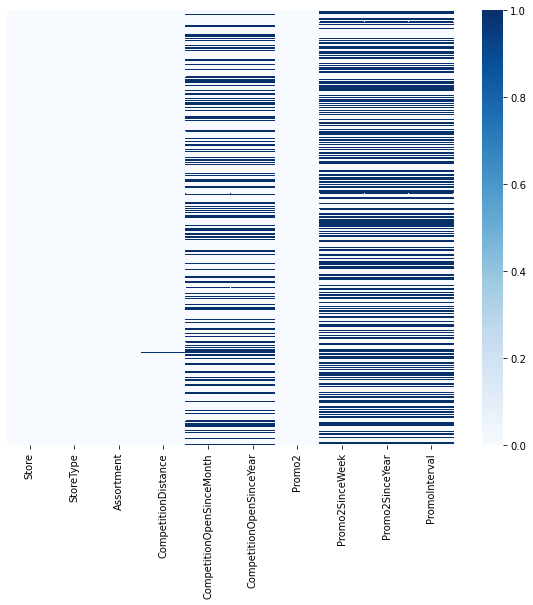

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df_store.isnull(),cmap="Blues",yticklabels=False)
plt.show()

In [57]:
df_store.loc[df_store.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [58]:
df_store.loc[df_store.CompetitionOpenSinceMonth.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [59]:
df_store.loc[df_store.Promo2==0]

#when promo2 is equal to zero it is or means that no promotion is applied,
#therefore the 3 columns [Promo2SinceWeek,Promo2SinceYear,PromoInterval]that contain nan we will fill them with 0

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [61]:
cols=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]
for str in cols:
    df_store[str].fillna(0,inplace=True)

In [62]:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<AxesSubplot:>

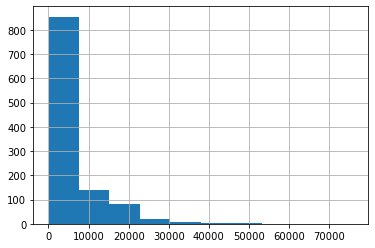

In [67]:
df_store.CompetitionDistance.hist()

C:\Users\loli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionDistance'>

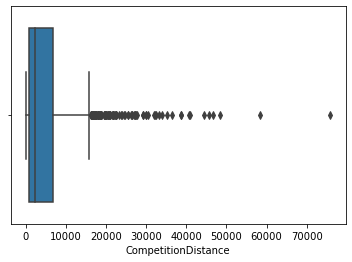

In [70]:
sns.boxplot(df_store.CompetitionDistance)

In [73]:
df_store.loc[df_store.CompetitionDistance>50000]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
121,122,a,c,58260.0,4.0,2013.0,0,0.0,0.0,0
452,453,a,c,75860.0,0.0,0.0,0,0.0,0.0,0


In [78]:
df_store.loc[df_store.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,0.0,0.0,0,0.0,0.0,0
621,622,a,c,NaN,0.0,0.0,0,0.0,0.0,0
878,879,d,a,NaN,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [79]:
#as we have outliers in column CompetitionDistance , it will be better to fill the messing value  with the median
df_store["CompetitionDistance"].fillna(df_store.CompetitionDistance.median(),inplace=True)

In [85]:
df_store.iloc[[290,621,878]]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,2325.0,0.0,0.0,0,0.0,0.0,0
621,622,a,c,2325.0,0.0,0.0,0,0.0,0.0,0
878,879,d,a,2325.0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

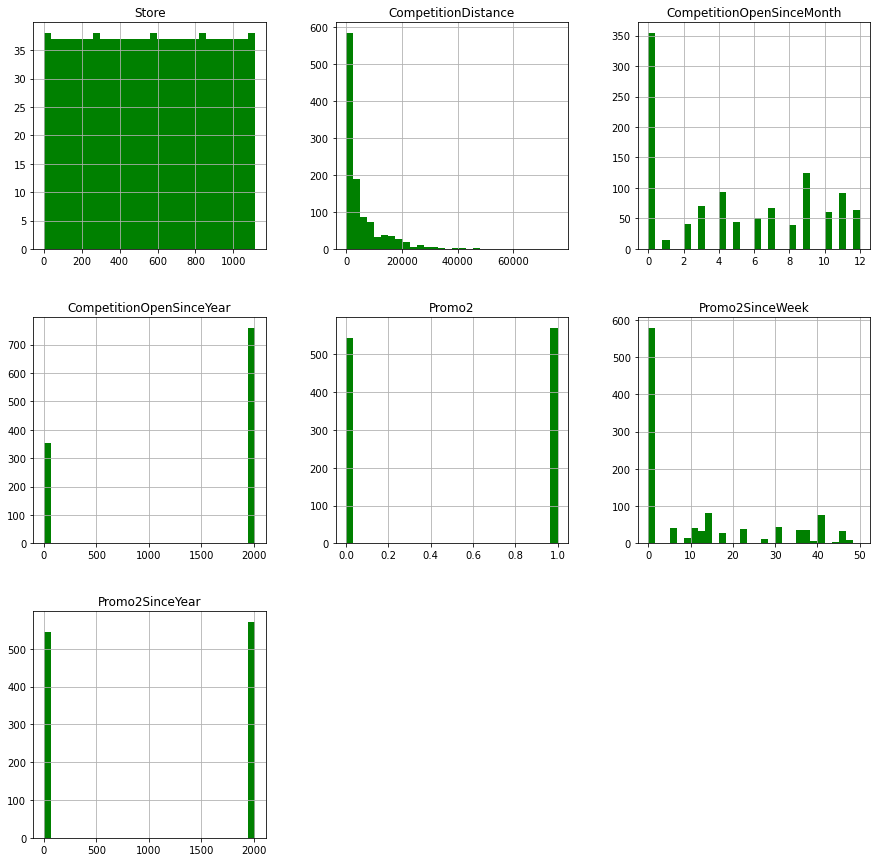

In [87]:
df_store.hist(bins=30,color='g',figsize=(15,15))

# Merging df_sales and df_store

In [90]:
# Let's combine both data frames depending on 'store'
df_sales_store = pd.merge(df_sales,df_store, how = 'inner', on = 'Store')


In [92]:
df_sales_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  int64         
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  float64       
 11  CompetitionOpenSinceMonth  844338 non-null  float64 

In [93]:
df_sales_store.to_csv("both.csv",index=False)

In [2]:
#df_sales_store= pd.read_csv("both.csv")


In [9]:
df_sales_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  int64         
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  float64       
 11  CompetitionOpenSinceMonth  844338 non-null  float64 

In [7]:
#df_sales_store["Date"]=pd.to_datetime(df_sales_store.Date)

In [8]:
df_sales_store.select_dtypes(include='object')

,StoreType,Assortment,PromoInterval
0,c,a,0
1,c,a,0
2,c,a,0
3,c,a,0
4,c,a,0
...,...,...,...
844333,a,a,0
844334,a,a,0
844335,a,a,0
844336,a,a,0


In [10]:
print(df_sales_store.StoreType.unique())
print("---------")
print(df_sales_store.StoreType.value_counts())
print("")
print(df_sales_store.Assortment.unique())
print("---------")
print(df_sales_store.Assortment.value_counts())

['c' 'a' 'd' 'b']
---------
a    457042
d    258768
c    112968
b     15560
Name: StoreType, dtype: int64

['a' 'c' 'b']
---------
a    444875
c    391254
b      8209
Name: Assortment, dtype: int64


In [11]:
mappingS={'a':1,'b':2,'c':3,'d':4}
mappA={'a':1,'b':2,'c':3}

In [12]:
df_sales_store.StoreType.replace(mappingS,inplace=True)
df_sales_store.Assortment.replace(mappA,inplace=True)

In [13]:
print(df_sales_store.StoreType.unique())
print("---------")
print(df_sales_store.StoreType.value_counts())
print("")
print(df_sales_store.Assortment.unique())
print("---------")
print(df_sales_store.Assortment.value_counts())

[3 1 4 2]
---------
1    457042
4    258768
3    112968
2     15560
Name: StoreType, dtype: int64

[1 3 2]
---------
1    444875
3    391254
2      8209
Name: Assortment, dtype: int64


In [14]:
month = df_sales_store.Date.dt.month
day=df_sales_store.Date.dt.day
week=df_sales_store.Date.dt.weekday

Text(0.5, 1.0, 'Average customers per month')

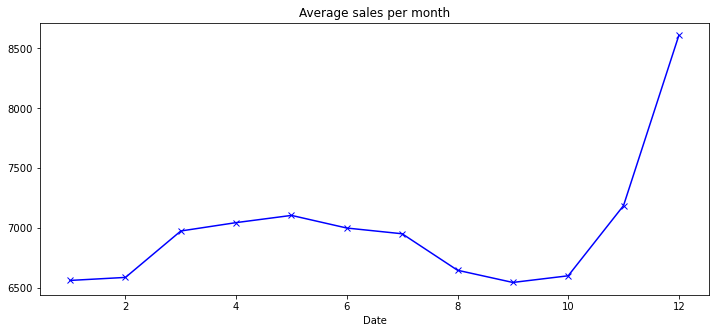

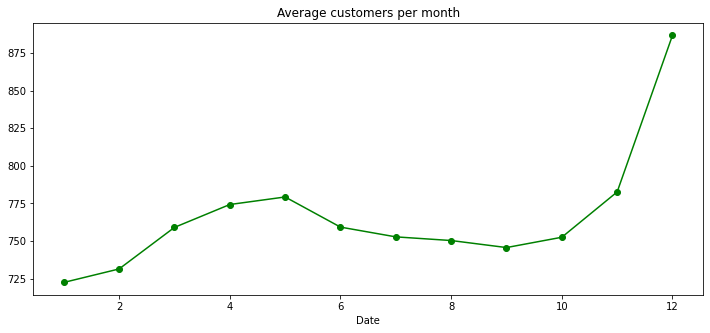

In [15]:
#Let's take a look at average sales and the number of customers per month

axis=df_sales_store.groupby(month)["Sales"].mean().plot(figsize=(12,5),marker='x',color='b')
axis.set_title("Average sales per month")
plt.figure()
axis=df_sales_store.groupby(month)["Customers"].mean().plot(figsize=(12,5),marker='o',color='g')
axis.set_title("Average customers per month")

Text(0.5, 1.0, 'Average customers per day')

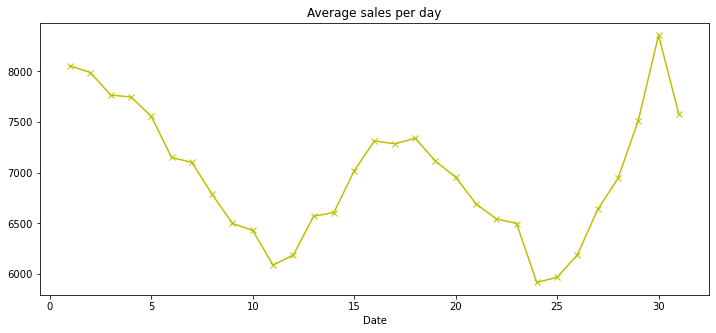

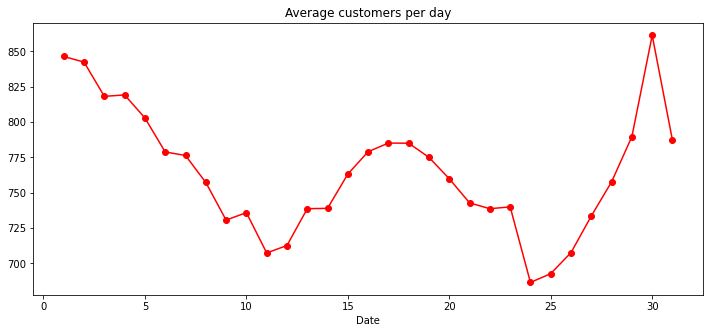

In [16]:
axis=df_sales_store.groupby(day)["Sales"].mean().plot(figsize=(12,5),marker='x',color='y')
axis.set_title("Average sales per day")
plt.figure()
axis=df_sales_store.groupby(day)["Customers"].mean().plot(figsize=(12,5),marker='o',color='r')
axis.set_title("Average customers per day")

Text(0.5, 1.0, 'Average customers per dayweek')

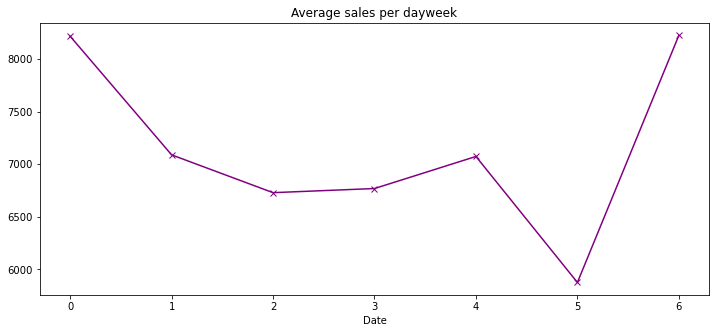

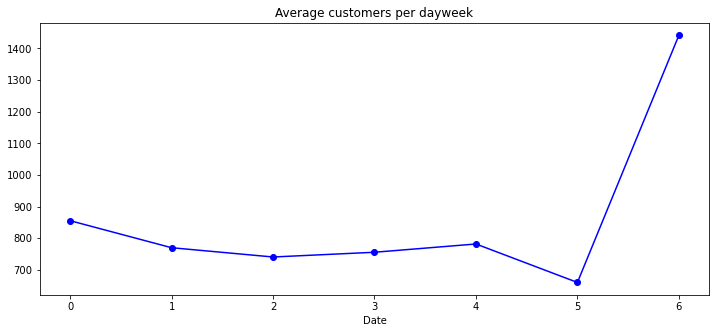

In [17]:
axis=df_sales_store.groupby(week)["Sales"].mean().plot(figsize=(12,5),marker='x',color='purple')
axis.set_title("Average sales per dayweek")
plt.figure()
axis=df_sales_store.groupby(week)["Customers"].mean().plot(figsize=(12,5),marker='o',color='b')
axis.set_title("Average customers per dayweek")

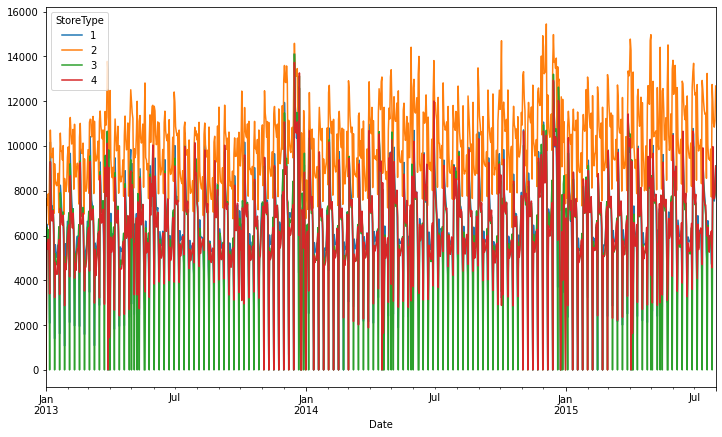

In [21]:

df_sales_store.groupby(["Date","StoreType"]).Sales.mean().unstack().fillna(0).plot(figsize=(12,7))
plt.show()

<AxesSubplot:xlabel='Date'>

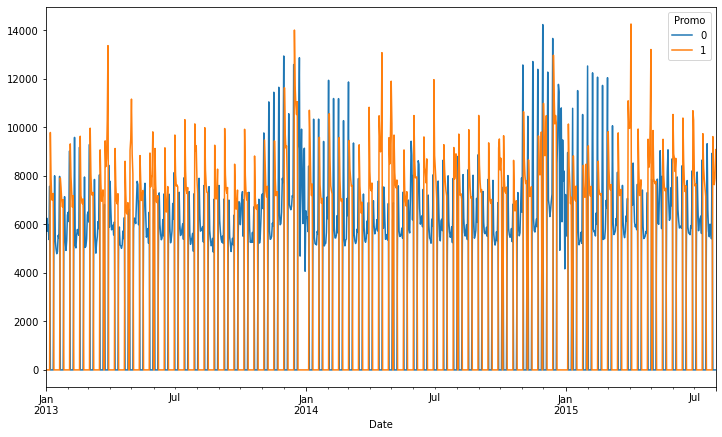

In [22]:
df_sales_store.groupby(["Date","Promo"]).Sales.mean().unstack().fillna(0).plot(figsize=(12,7))

In [23]:
cor=df_sales_store.corr()

In [25]:
#hight correlation is between -1,1
cor.Sales.sort_values(ascending=False)
#correlation with customers is very hight 
#next we analyse promo with sales.
#promo 2 appears to be non-effective ,but will formule hypothesis

Sales                        1.000000
Customers                    0.823552
Promo                        0.368199
Assortment                   0.109015
SchoolHoliday                0.038635
StateHoliday                 0.020106
Store                        0.007723
CompetitionOpenSinceYear     0.005257
StoreType                   -0.016211
CompetitionOpenSinceMonth   -0.018369
CompetitionDistance         -0.035908
Promo2SinceWeek             -0.058493
Promo2                      -0.127556
Promo2SinceYear             -0.127581
DayOfWeek                   -0.178753
Name: Sales, dtype: float64

# Statistical Analysis and Hypothesis Testing 


### CORRELATION PEARSON AND SPEARMAN

In [32]:
df_sales_store.corr(method='pearson')['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823552
Promo                        0.368199
Assortment                   0.109015
SchoolHoliday                0.038635
StateHoliday                 0.020106
Store                        0.007723
CompetitionOpenSinceYear     0.005257
StoreType                   -0.016211
CompetitionOpenSinceMonth   -0.018369
CompetitionDistance         -0.035908
Promo2SinceWeek             -0.058493
Promo2                      -0.127556
Promo2SinceYear             -0.127581
DayOfWeek                   -0.178753
Name: Sales, dtype: float64

In [34]:
#Spearman rank correlation
df_sales_store.corr(method='spearman')['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.831836
Promo                        0.420444
Assortment                   0.117578
SchoolHoliday                0.038190
CompetitionOpenSinceYear     0.027957
StoreType                    0.023413
StateHoliday                 0.009041
Store                        0.000837
CompetitionOpenSinceMonth   -0.017998
CompetitionDistance         -0.035163
Promo2SinceWeek             -0.083093
Promo2                      -0.116573
Promo2SinceYear             -0.116816
DayOfWeek                   -0.179176
Name: Sales, dtype: float64

__Hypothesis 0: There is no relationship between SALES and PROMO2__

In [35]:
#Calculate a Spearman correlation coefficient with associated p-value.
# 'omit': performs the calculations ignoring nan values

stats.spearmanr(df_sales_store.Sales, df_sales_store.Promo2, 
                     nan_policy = "omit")

SpearmanrResult(correlation=-0.11657344771861122, pvalue=0.0)

In [36]:
r,pvalue= stats.spearmanr(df_sales_store.Sales, df_sales_store.Promo2, 
                     nan_policy = "omit")

In [47]:
pvalue

0.0

__Reject Hypothesis 0  at 5% significance level -> There is a  relationship between Sales  and Promo2__

__Hypothesis 1: There is no relationship between SALES and PROMO__

In [49]:
r,pvalue= stats.spearmanr(df_sales_store.Sales, df_sales_store.Promo, 
                     nan_policy = "omit")

In [52]:
pvalue

0.0

__Reject Hypothesis 1 at 5% significance level -> There is a  relationship between Sales  and Promo__

__Hypothesis 2: There is no relationship between SALES and CompetitionDistance ___        

In [54]:
r,pvalue=stats.spearmanr(df_sales_store.Sales, df_sales_store.CompetitionDistance, 
                     nan_policy = "omit")

In [56]:
pvalue.round()

0.0

__Reject Hypothesis 2  at 5% significance level -> There is a  relationship between Sales  and CompetitionDistance__

## Next step

In order to keep a good prediction of the sale of stores, ewe have to consider creating a prediction based on holidays and not holidays days.